In [2]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE


In [4]:
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check the first few rows of the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Check for missing values
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(numeric_cols)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [9]:
# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in categorical columns with the mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# Check for missing values again
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
# Convert categorical columns using LabelEncoder
le = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [13]:
# Feature engineering
X = df.drop(['Churn'], axis=1)  # Drop target column
y = df['Churn']  # Target column


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Identify categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['customerID'], dtype='object')


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    if df[col].dtype == 'object':  # Only apply LabelEncoder to object columns
        df[col] = le.fit_transform(df[col])

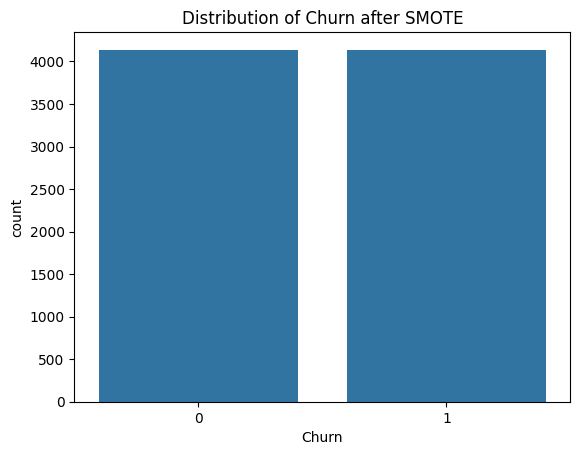

In [18]:
from imblearn.over_sampling import SMOTE

# Split data into X and y
X = df.drop(['Churn'], axis=1)  # Features
y = df['Churn']  # Target variable

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the distribution after resampling
import seaborn as sns
sns.countplot(x=y_train_res)
plt.title('Distribution of Churn after SMOTE')
plt.show()


In [19]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [34]:
!pip install --upgrade xgboost
!pip install --upgrade scikit-learn


In [36]:
import xgboost as xgb

# Assuming X_train_res and y_train_res are ready
model = xgb.XGBClassifier(use_label_encoder=False)  # disable the warning about label encoder
model.fit(X_train_res, y_train_res)
print(model.score(X_test, y_test)) 

C:\Users\ramre\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7863733144073811


In [37]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (if necessary)
le = LabelEncoder()
y_train_res = le.fit_transform(y_train_res)


In [38]:
print(X_train_res.dtypes)  # Check for non-numeric columns
print(X_train_res.isnull().sum())  # Check for missing values


customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCha

In [39]:
# Random Forest Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Precision: {rf_precision}")
print(f"Random Forest Recall: {rf_recall}")


Random Forest Accuracy: 0.7785663591199432
Random Forest Precision: 0.5788113695090439
Random Forest Recall: 0.6005361930294906


In [40]:
# XGBoost Predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"XGBoost Precision: {xgb_precision}")
print(f"XGBoost Recall: {xgb_recall}")


XGBoost Accuracy: 0.7863733144073811
XGBoost Precision: 0.6016949152542372
XGBoost Recall: 0.5710455764075067


In [43]:
from sklearn.metrics import f1_score

rf_f1 = f1_score(y_test, rf_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

print(f"Random Forest F1-score: {rf_f1}")
print(f"XGBoost F1-score: {xgb_f1}")


Random Forest F1-score: 0.5894736842105263
XGBoost F1-score: 0.5859697386519945


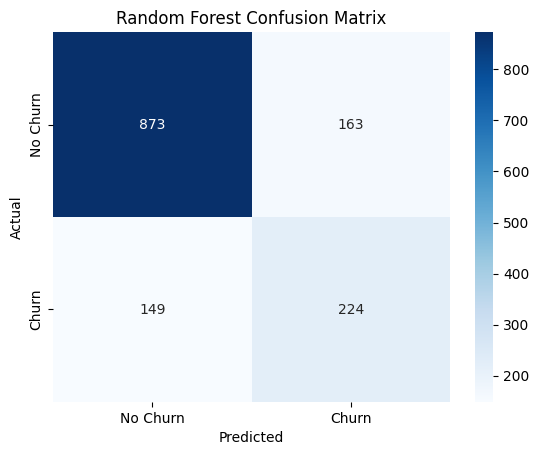

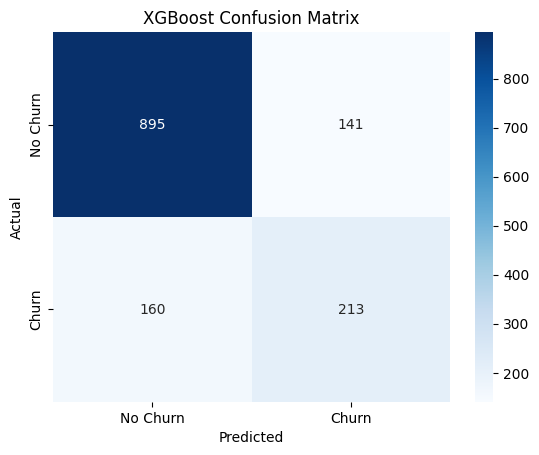

In [41]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Confusion Matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


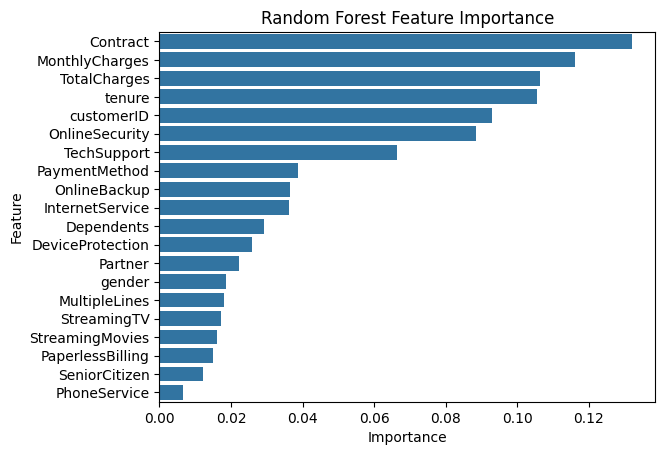

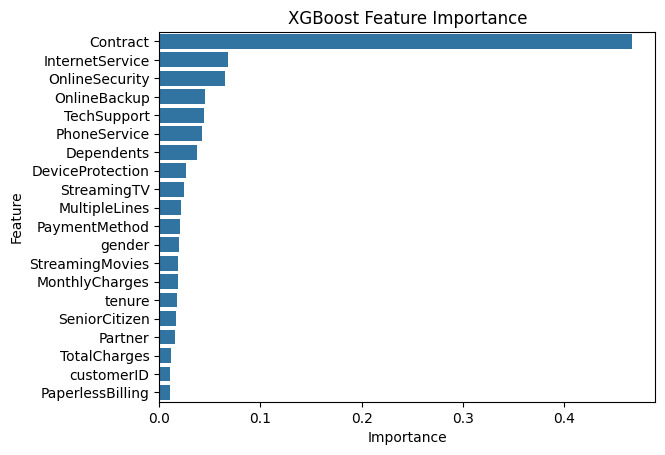

In [42]:
# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
rf_feature_names = X.columns
rf_feature_importance_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

# XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': rf_feature_names, 'Importance': xgb_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()
